In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'polya'
go_gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


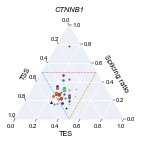

In [3]:
plot_obs_human_simplex_with_centroid(cerberus_h5,
                  'CTNNB1',
                  'figures/', 
                  source='sample_det',
                  gene_subset=gene_subset,
                  ver=ver)

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2047: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2046: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
> /Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/plotting.py(3423)plot_browser_isos()
   3421 
   3422     # enforce min tpm
-> 3423     tpm_df = tpm_df.loc[tpm_df[obs_condition]>min_tpm]
   3424 
   3425     if order == 'tss':



ipdb>  tpm_df


                            mcf10a
ENSG00000168036[1,15,1]  40.821136
ENSG00000168036[1,13,1]  17.425522
ENSG00000168036[1,1,1]   12.080589
ENSG00000168036[1,14,1]   3.553114
ENSG00000168036[1,16,1]   3.200855
ENSG00000168036[1,57,1]   1.767401
ENSG00000168036[1,9,1]    0.716727


ipdb>  n


> /Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/plotting.py(3425)plot_browser_isos()
   3423     tpm_df = tpm_df.loc[tpm_df[obs_condition]>min_tpm]
   3424 
-> 3425     if order == 'tss':
   3426         tpm_df = add_feat(tpm_df, kind='tss', col='index')
   3427         tpm_df.sort_values(by=['tss', obs_condition], ascending=[True, False], inplace=True)



ipdb>  tpm_df


                            mcf10a
ENSG00000168036[1,15,1]  40.821136
ENSG00000168036[1,13,1]  17.425522
ENSG00000168036[1,1,1]   12.080589
ENSG00000168036[1,14,1]   3.553114
ENSG00000168036[1,16,1]   3.200855
ENSG00000168036[1,57,1]   1.767401


ipdb>  c


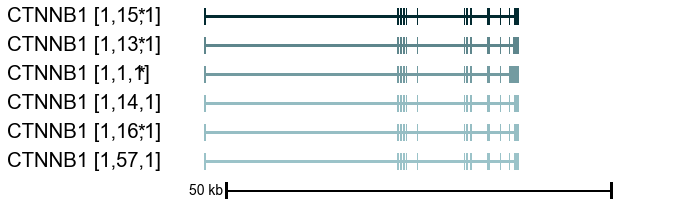

In [3]:
gene = 'CTNNB1'
obs_col = 'sample'
obs_condition = 'mcf10a'
light_shade = '#9bc3c9'
dark_shade= '#022a30'

ca = cerberus.read(cerberus_h5)
sg = swan.read(swan_file)
ax, tpm_df = plot_browser_isos(ca, sg, gene,
                             obs_col, obs_condition,
                             filt_ab, major_isos,
                             h=0.2, min_tpm=1,
                             light_shade=light_shade, dark_shade=dark_shade)
fname = '{}{}_{}_isos_browser.pdf'.format('figures/', gene.lower(), obs_condition)
plt.savefig(fname, dpi=500)

In [ ]:
gene = 'CTNNB1'
obs_col = 'sample'
obs_condition = 'caco2'
light_shade = '#ffdeb3'
dark_shade = '#804800'
ax, tpm_df = plot_browser_isos(ca, sg, gene,
                             obs_col, obs_condition,
                             filt_ab, major_isos,
                             h=0.2,
                             add_tss=True, order='tss',
                             light_shade=light_shade, 
                             dark_shade=dark_shade)

fname = '{}{}_{}_isos_browser.pdf'.format(dyn_dir, gene.lower(), obs_condition)
plt.savefig(fname, dpi=500)

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
> /Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/plotting.py(3420)plot_browser_isos()
   3418     import pdb
   3419     pdb.set_trace()
-> 3420     if order == 'tss':
   3421         tpm_df = add_feat(tpm_df, kind='tss', col='index')
   3422         tpm_df.sort_values(by=['tss', obs_condition], ascending=[True, False], inplace=True)



ipdb>  tpm_df


                               caco2
ENSG00000168036[1,15,1]    24.354332
ENSG00000168036[4,20,2]    23.444126
ENSG00000168036[1,13,1]    19.319145
ENSG00000168036[1,1,1]     15.582815
ENSG00000168036[4,22,2]    15.173739
ENSG00000168036[4,21,2]    14.307836
ENSG00000168036[16,1,1]     5.832911
ENSG00000168036[1,14,1]     3.303380
ENSG00000168036[3,7,2]      2.232938
ENSG00000168036[7,48,2]     1.936345
ENSG00000168036[1,34,3]     1.868166
ENSG00000168036[3,8,2]      1.503393
ENSG00000168036[10,40,10]   1.435214
ENSG00000168036[1,16,1]     1.002262
ENSG00000168036[1,30,1]     0.934083
ENSG00000168036[15,56,2]    0.501131
ENSG00000168036[1,31,1]     0.501131
ENSG00000168036[1,14,2]     0.501131
ENSG00000168036[4,39,2]     0.501131
